<a href="https://colab.research.google.com/github/4may/MIResearch/blob/master/silicic_acid_and_alumina_clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 初めてのマテリアルズインフォマティクス

Materials Projectから適当に２種類の化合物に関するデータを拾ってきて、クラスタリングしてみる。

2つのクラスタに分かれてくれればOK。

まずは、pymatgenをインストールする。

In [1]:
pip install pymatgen

     |████████████████████████████████| 2.7MB 8.1MB/s 
     |████████████████████████████████| 112kB 12.2MB/s 
     |████████████████████████████████| 61kB 8.3MB/s 
     |████████████████████████████████| 296kB 30.5MB/s 
     |████████████████████████████████| 11.5MB 51.6MB/s 
     |████████████████████████████████| 552kB 49.9MB/s 
  Created wheel for pymatgen: filename=pymatgen-2020.4.29-cp36-cp36m-linux_x86_64.whl size=3528725 sha256=4045f00547870bcdc53f710999f6467bf5aee77478519333520ff21e2fe7cfde
  Stored in directory: /root/.cache/pip/wheels/0c/4e/ee/13ca3f09aadb9328e6fe8039bc5df20f80d02bfaee15b620f8
Successfully built pymatgen
  Found existing installation: plotly 4.4.1
    Uninstalling plotly-4.4.1:
      Successfully uninstalled plotly-4.4.1


試しに、ケイ酸(SiO2)のデータを取得してみる。

まずは、REST API用のAPIキーを、Materials Projectの[Dashboard](https://materialsproject.org/dashboard)から、取得する。

In [0]:
API_KEY = "MY_API_KEY""

次に、RESTインターフェースMPResterの引数に、取得したAPIを指定する。

In [5]:
from pymatgen import MPRester

mp_rester = MPRester(API_KEY)

materials IDから、その材料の情報をdict形式で取得してみよう。以下の例では、$SiO_2$の[materials ID](https://materialsproject.org/materials/mp-546794/)を指定している。materials IDは、materials project上で検索すると取得できる。

In [0]:
doc = mp_rester.get_doc("mp-546794")

keyの数を表示してみる。

In [12]:
len(doc.keys())

75

どんなkeyが含まれているだろうか。

In [11]:
doc.keys()

dict_keys(['_id', 'anonymous_formula', 'band_gap', 'blessed_tasks', 'bv_structure', 'chemsys', 'cif', 'cifs', 'cohesive_energy', 'cpu_time', 'created_at', 'decomposes_to', 'delta_volume', 'density', 'deprecated', 'e_above_hull', 'efermi', 'elements', 'encut', 'final_energy', 'final_energy_per_atom', 'formation_energy_per_atom', 'full_formula', 'has', 'has_bandstructure', 'hubbards', 'icsd_id', 'icsd_ids', 'initial_structure', 'input', 'ionic_steps', 'is_compatible', 'is_hubbard', 'is_ordered', 'magnetic_type', 'nelements', 'nkpts', 'nsites', 'ntask_ids', 'original_task_id', 'oxide_type', 'pretty_formula', 'pseudo_potential', 'reduced_cell_formula', 'run_stats', 'run_type', 'snl', 'snl_final', 'snlgroup_changed', 'snlgroup_id', 'snlgroup_id_final', 'spacegroup', 'structure', 'task_id', 'task_ids', 'total_magnetization', 'unit_cell_formula', 'updated_at', 'volume', 'warnings', 'xrd', 'band_structure_uniform', 'dos', 'band_structure', 'static', 'exp', 'exp_lattice', 'elasticity', 'piezo',

材料の特性に関する情報(つまり、特徴量)がわんさか出てきた！機械学習するときは、この中から自分が興味のある特徴量を指定するか、もしくは次元削減などで調整してやれば良さそうだ。

keyを使って、要素にアクセスしてみる。

In [14]:
doc['band_gap']

5.703399999999999

全ての要素の値を表示してみる。

In [81]:
doc.values()

dict_values(['5dd47d64cd0446b0dbbd1abf', {'A': 1.0, 'B': 2.0}, 5.703399999999999, {'GGA NSCF Uniform': 'mp-655516', 'GGA Structure Optimization': 'mp-604637'}, None, 'O-Si', "# generated using pymatgen\ndata_SiO2\n_symmetry_space_group_name_H-M   'P 1'\n_cell_length_a   5.05186371\n_cell_length_b   5.05228454\n_cell_length_c   5.13582199\n_cell_angle_alpha   119.53417744\n_cell_angle_beta   119.55136741\n_cell_angle_gamma   89.99736465\n_symmetry_Int_Tables_number   1\n_chemical_formula_structural   SiO2\n_chemical_formula_sum   'Si2 O4'\n_cell_volume   93.95891867\n_cell_formula_units_Z   2\nloop_\n _symmetry_equiv_pos_site_id\n _symmetry_equiv_pos_as_xyz\n  1  'x, y, z'\nloop_\n _atom_site_type_symbol\n _atom_site_label\n _atom_site_symmetry_multiplicity\n _atom_site_fract_x\n _atom_site_fract_y\n _atom_site_fract_z\n _atom_site_occupancy\n  Si  Si0  1  0.004042  0.997981  0.998087  1\n  Si  Si1  1  0.253937  0.747930  0.497858  1\n  O  O2  1  0.220394  0.373128  0.251214  1\n  O  O3

なお、materialas IDは、get_materials_ids関数を使っても取得できる(プログラムで完結させるならこちらの方法が良いか)。この場合、関数の引数として化学式をstr型で指定する。

In [19]:
sio2_ids = mp_rester.get_materials_ids('SiO2')
sio2_ids[:5]

['mp-557465', 'mp-600005', 'mp-640917', 'mp-9258', 'mp-669426']

Materials APIで用意されている材料情報(property)は、supported_propertiesで確認できる。

In [20]:
mp_rester.supported_properties

('energy',
 'energy_per_atom',
 'volume',
 'formation_energy_per_atom',
 'nsites',
 'unit_cell_formula',
 'pretty_formula',
 'is_hubbard',
 'elements',
 'nelements',
 'e_above_hull',
 'hubbards',
 'is_compatible',
 'spacegroup',
 'task_ids',
 'band_gap',
 'density',
 'icsd_id',
 'icsd_ids',
 'cif',
 'total_magnetization',
 'material_id',
 'oxide_type',
 'tags',
 'elasticity')

In [23]:
len(mp_rester.supported_properties)

25

全部で25項目あるようだ。

次に、query関数を使ってデータを取得してみよう。query関数は二つの必須パラメータを持つ。

* criteria
* properties

Matarials APIでは、criteriaというMongo DBのフォーマットにしたがって、条件を指定する必要がある。また、propertiesに抽出したい特徴量を指定する。

ここでは、criteriaとして、SiO2という化学式を指定しよう。また、propertiesとして、"band_gap", "volume"の２つの特徴量を指定してみよう。

In [0]:
properties = ["band_gap", "volume"]
criteria = {"pretty_formula": "SiO2"}

sio2_data = mp_rester.query(criteria=criteria, properties=properties)

何このデータが取れただろうか

In [37]:
len(sio2_data)

314

dataの中身を見てみよう。

In [38]:
sio2_data[:5]

[{'band_gap': 5.522, 'volume': 334.1116997448404},
 {'band_gap': 5.4398, 'volume': 992.5364057908766},
 {'band_gap': 0.6611999999999996, 'volume': 131.53069589914233},
 {'band_gap': 4.0015, 'volume': 90.39379466514217},
 {'band_gap': 5.6183000000000005, 'volume': 339.8621053532599}]

同様に、アルミナ(Al2O3)のデータも取得してみよう。

In [0]:
criteria = {"pretty_formula": "Al2O3"}

al2o3_data = mp_rester.query(criteria=criteria, properties=properties)

In [40]:
len(al2o3_data)

78

In [41]:
al2o3_data[:5]

[{'band_gap': 3.2885999999999997, 'volume': 1071.7336492231386},
 {'band_gap': 3.3923999999999994, 'volume': 1098.225045907968},
 {'band_gap': 3.2518000000000002, 'volume': 1156.5816295096818},
 {'band_gap': 4.8274, 'volume': 370.3349134610843},
 {'band_gap': 3.7681999999999993, 'volume': 378.7209302897658}]

いずれも、一つのデータが辞書形式で保存されていて、その辞書の配列が返ってきている。

機械学習のデータとして扱いやすくするために、データ数×特徴量数の形式に変換しよう。つまり、ケイ酸の場合は、314×2の行列、アルミナの場合は74×２の行列に変換する。

In [61]:
import numpy as np

sio2_list = list(map(lambda item: [item['band_gap'], item['volume']], sio2_data))
sio2_matrix = np.reshape(sio2_list, (len(sio2_list), 2))
sio2_matrix.shape

(314, 2)

In [63]:
sio2_matrix[:5, :]

array([[5.52200000e+00, 3.34111700e+02],
       [5.43980000e+00, 9.92536406e+02],
       [6.61200000e-01, 1.31530696e+02],
       [4.00150000e+00, 9.03937947e+01],
       [5.61830000e+00, 3.39862105e+02]])

In [62]:
al2o3_list = list(map(lambda item: [item['band_gap'], item['volume']], al2o3_data))
al2o3_matrix = np.reshape(al2o3_list, (len(al2o3_list), 2))
al2o3_matrix.shape

(78, 2)

In [64]:
al2o3_matrix[:5, :]

array([[   3.2886    , 1071.73364922],
       [   3.3924    , 1098.22504591],
       [   3.2518    , 1156.58162951],
       [   4.8274    ,  370.33491346],
       [   3.7682    ,  378.72093029]])

それぞれのデータの分布を見てみる。



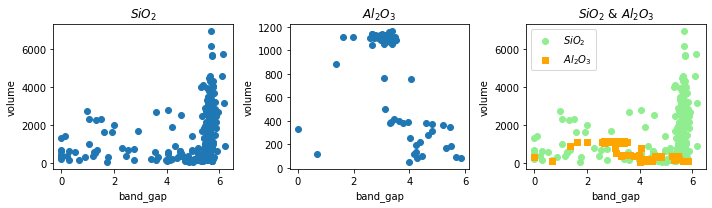

In [80]:
import matplotlib.pyplot as plt

f, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(10,3))

ax1.scatter(sio2_matrix[:, 0], sio2_matrix[:, 1], marker='o')
ax1.set_xlabel('band_gap')
ax1.set_ylabel('volume')
ax1.set_title('$SiO_2$')

ax2.scatter(al2o3_matrix[:, 0], al2o3_matrix[:, 1], marker='o')
ax2.set_xlabel('band_gap')
ax2.set_ylabel('volume')
ax2.set_title('$Al_2O_3$')

ax3.scatter(sio2_matrix[:, 0], sio2_matrix[:, 1], marker='o', c='lightgreen', label='$SiO_2$')
ax3.scatter(al2o3_matrix[:, 0], al2o3_matrix[:, 1], marker='s', c='orange', label='$Al_2O_3$')
ax3.set_xlabel('band_gap')
ax3.set_ylabel('volume')
ax3.set_title('$SiO_2$ & $Al_2O_3$')

plt.legend()
plt.tight_layout()
plt.show()

oh,... この分布ではクラスタリングはうまくいかなそうだ。$SiO_2$の分布に$Al_2O_3$の分布が被ってしまっている。

試しに、やるだけやってみよう。

まず、クラスタリング対象のデータを作成する。データの結合方向には、vstack関数を使う。

In [69]:
X = np.vstack((sio2_matrix, al2o3_matrix))
X.shape

(392, 2)

k-means++を試す。

In [0]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=2, init='k-means++', n_init=10, max_iter=300, tol=1e-04, random_state=0)

y_kmeans = kmeans.fit_predict(X)

結果を描画してみよう。

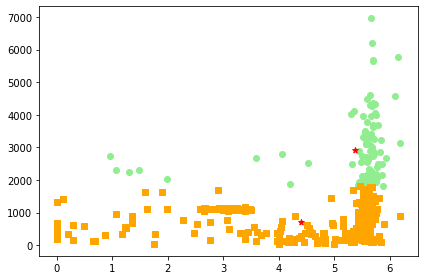

In [75]:
plt.scatter(X[y_kmeans == 0, 0], X[y_kmeans == 0, 1], marker='o', c='lightgreen', label='cluster1')
plt.scatter(X[y_kmeans == 1, 0], X[y_kmeans == 1, 1], marker='s', c='orange', label='cluster2')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], c='red', marker='*', label='centroids')
plt.tight_layout()
plt.show()

ですよねー。$SiO_2$の上と下で分かれている。

ということで、特徴量の選択をやり直したほうがよさそうだ。

Materials Projectで使えるプロパティの説明は、[公式サイト](https://materialsproject.org/docs/api)に書いてある。

肉眼でひたすら特徴量の組みを作るのは面倒なので、以下のような感じでやってみよう。

1. 二つの特徴量の組み合わせのパターンを列挙
2. step1のパターンごとにクラスタリング
3. 各クラスタリング結果ごとに、silhouette係数の平均値を計算
4. silhouette係数が最も高いパターンを採用！！

**step1**

In [0]:
from itertools import combinations

candidate_properties = ['energy', 'energy_per_atom', 'volume', 'density', 'nsites', 
                        'formation_energy_per_atom', 'e_above_hull', 'band_gap']
combinated_properties = combinations(candidate_properties, 2)

**step2~step4**

In [231]:
from sklearn.metrics import silhouette_score

#各propertyの組み合わせのscore
best_properties = { "prop1" : "", "prop2" : "", "score" : 0 }

for prop in combinated_properties:
  #Materials Projectからデータを取得
  X_sio2 = mp_rester.query(criteria={"pretty_formula": "SiO2"}, properties=[prop[0], prop[1]])
  X_al2o3 = mp_rester.query(criteria={"pretty_formula": "Al2O3"}, properties=[prop[0], prop[1]])

  #入力データを変形
  X_sio2 = list(map(lambda item: [item[prop[0]], item[prop[1]]], X_sio2))
  X_sio2 = np.reshape(X_sio2, (len(X_sio2), 2))
  
  X_al2o3 = list(map(lambda item: [item[prop[0]], item[prop[1]]], X_al2o3))
  X_al2o3 = np.reshape(X_al2o3, (len(X_al2o3), 2))

  #入力データを合体
  X = np.vstack((X_sio2, X_al2o3))

  #クラスタリング
  kmeans = KMeans(n_clusters=2, init='k-means++', n_init=10, max_iter=300, tol=1e-04, random_state=0)
  y_kmeans = kmeans.fit_predict(X)

  #平均silhouette値を取得
  score = silhouette_score(X, y_kmeans, metric='euclidean')
  print("%s, and %s 's score : %s" % (prop[0], prop[1], score))
  
  #scoreの最大の組み合わせを更新
  if score > best_properties["score"]:
    print("update best!")
    best_properties["prop1"] = prop[0]
    best_properties["prop2"] = prop[1]
    best_properties["score"] = score

print('best properties:')
best_properties

energy, and energy_per_atom 's score : 0.6226629417254774
update best!
energy, and volume 's score : 0.6499584294731149
update best!
energy, and density 's score : 0.6226468353325867
energy, and nsites 's score : 0.622950322970628
energy, and formation_energy_per_atom 's score : 0.6226638344648867
energy, and e_above_hull 's score : 0.6226637997866993
energy, and band_gap 's score : 0.6226102727957354
energy_per_atom, and volume 's score : 0.6692786020976151
update best!
energy_per_atom, and density 's score : 0.647435949072924
energy_per_atom, and nsites 's score : 0.6450678174586104
energy_per_atom, and formation_energy_per_atom 's score : 0.7519125993399479
update best!
energy_per_atom, and e_above_hull 's score : 0.6958968881123033
energy_per_atom, and band_gap 's score : 0.7667527055164054
update best!
volume, and density 's score : 0.6692777405555342
volume, and nsites 's score : 0.6685821170724754
volume, and formation_energy_per_atom 's score : 0.6692787487310472
volume, and e_

{'prop1': 'formation_energy_per_atom',
 'prop2': 'e_above_hull',
 'score': 0.8455860088447512}

formation_energy_per_atomとe_above_hullの組み合わせが一番scoreが高くなった。0.84なので、まぁまぁ良さそう。それでは、クラスタリング結果をみてみよう。

In [0]:
property1 = "formation_energy_per_atom"
property2 = "e_above_hull"
X_sio2 = mp_rester.query(criteria={"pretty_formula": "SiO2"}, properties=[property1, property2])
X_al2o3 = mp_rester.query(criteria={"pretty_formula": "Al2O3"}, properties=[property1, property2])

#入力データを変形
X_sio2 = list(map(lambda item: [item[property1], item[property2]], X_sio2))
X_sio2 = np.reshape(X_sio2, (len(X_sio2), 2))
  
X_al2o3 = list(map(lambda item: [item[property1], item[property2]], X_al2o3))
X_al2o3 = np.reshape(X_al2o3, (len(X_al2o3), 2))

#入力データを合体
X = np.vstack((X_sio2, X_al2o3))

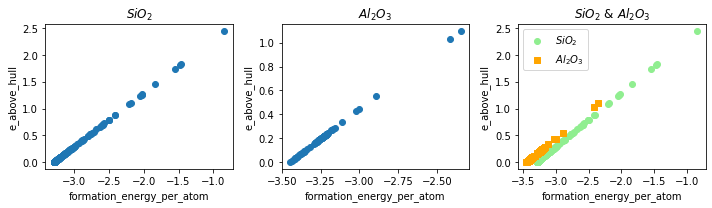

In [201]:
f, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(10,3))

ax1.scatter(X_sio2[:, 0], X_sio2[:, 1], marker='o')
ax1.set_xlabel(property1)
ax1.set_ylabel(property2)
ax1.set_title('$SiO_2$')

ax2.scatter(X_al2o3[:, 0], X_al2o3[:, 1], marker='o')
ax2.set_xlabel(property1)
ax2.set_ylabel(property2)
ax2.set_title('$Al_2O_3$')

ax3.scatter(X_sio2[:, 0], X_sio2[:, 1], marker='o', c='lightgreen', label='$SiO_2$')
ax3.scatter(X_al2o3[:, 0], X_al2o3[:, 1], marker='s', c='orange', label='$Al_2O_3$')
ax3.set_xlabel(property1)
ax3.set_ylabel(property2)
ax3.set_title('$SiO_2$ & $Al_2O_3$')

plt.legend()
plt.tight_layout()
plt.show()

In [0]:
#クラスタリング
kmeans = KMeans(n_clusters=2, init='k-means++', n_init=10, max_iter=300, tol=1e-04, random_state=0)
y_kmeans = kmeans.fit_predict(X)

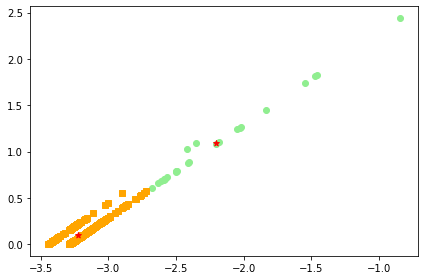

In [202]:
plt.scatter(X[y_kmeans == 0, 0], X[y_kmeans == 0, 1], marker='o', c='lightgreen', label='cluster1')
plt.scatter(X[y_kmeans == 1, 0], X[y_kmeans == 1, 1], marker='s', c='orange', label='cluster2')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], c='red', marker='*', label='centroids')
plt.tight_layout()
plt.show()

お、おう・・・

この分布だと、線状のクラスタが構成できるDBSCANのが良さそう。

In [0]:
from sklearn.cluster import DBSCAN

db = DBSCAN(eps=0.1, min_samples=5, metric='euclidean')
y_db = db.fit_predict(X)

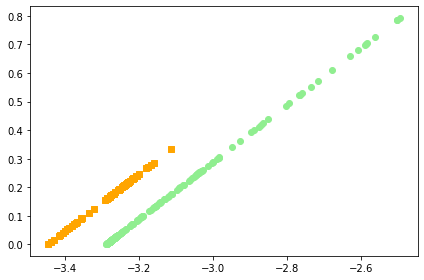

In [214]:
plt.scatter(X[y_db == 0, 0], X[y_db == 0, 1], marker='o', c='lightgreen', label='cluster1')
plt.scatter(X[y_db == 1, 0], X[y_db == 1, 1], marker='s', c='orange', label='cluster2')
plt.tight_layout()
plt.show()

きれいに分離できた！

ということで、ケイ酸とアルミナのクラスタリングでは、特徴量formation_energy_per_atomとe_above_hullに対して、DBSCANを行うと良い結果が得られた。

あくまで特徴量を二つに限定した場合なので、特徴量を３つ４つと増やすと違う結果になるだろう。

思ったのは、**ドメインの知識が欲しい**

特徴量を選択する際に、どの化学的な特性に着目すれば良いか、そもそもクラスタリング対象の化合物は特性で区別できるものなのかなど、分からんゴロシだった・・・。今回は組み合わせの数が二つだったから網羅的に探索できたけど、特徴量の数が増えると・・・。化学的な知識があればもっとスムーズに解析できたかもしれない。

**しかし分離できるとスッキリする**

ちなみに、formation_energy_per_atomとe_above_hullは、同じカテゴリのプロパティで、Thermodynamic propertiesh(熱力学的なプロパティ)に該当するみたい。

* formation_energy_per_atom : 単位格子内の原子ごとの形成エネルギー
* e_above_hull : 構造における凸包(convex hull)上のエネルギー。熱力学的な安定性を表す。正の値だと、不安定。

次回は、化合物よりもより大きな材料のデータを対象に分析してみたい。